1. Analisa algoritma untuk logistic_regression.py. Dan analisa algoritmanya dan jalankan di komputer anda. (Untuk Chapter 2)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn import linear_model,neighbors,datasets
from utilities import visualize_classifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from logpy import run, fact, eq, Relation, var

ModuleNotFoundError: No module named 'logpy'

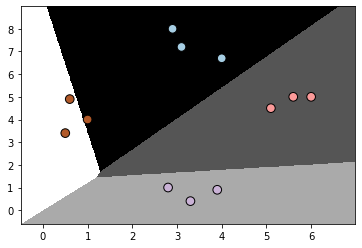

In [37]:
# Define sample input data
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

# Create the logistic regression classifier
classifier = linear_model.LogisticRegression(solver='liblinear', C=0.5)

# Train the classifier
classifier.fit(X, y)

# Visualize the performance of the classifier 
visualize_classifier(classifier, X, y)

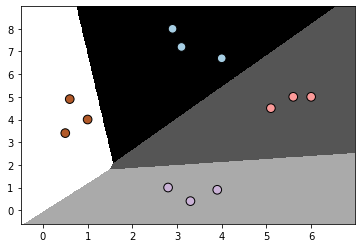

In [41]:
classifier = linear_model.LogisticRegression(solver='liblinear')
# Train the classifier
classifier.fit(X, y)

# Visualize the performance of the classifier 
visualize_classifier(classifier, X, y)

2. Analisa algoritma untuk decision_trees.py. Dan analisa algoritmanya dan jalankan di komputer anda. (Untuk Chapter 3)

/tmp/ipykernel_11135/18635648.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black',


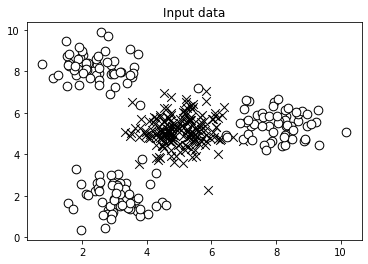

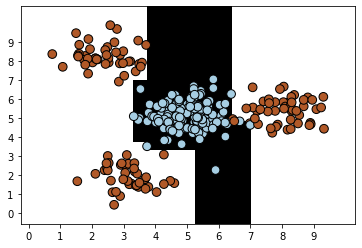

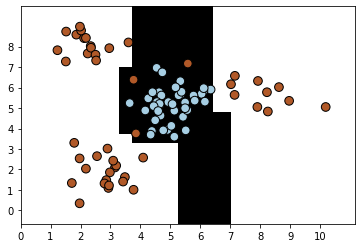


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

########################################



In [34]:
input_file = 'data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Separate input data into two classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', 
        edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
        edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

# Split data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=5)

# Decision Trees classifier 
params = {'random_state': 0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)

# Training Dataset
visualize_classifier(classifier, X_train, y_train)
y_test_pred = classifier.predict(X_test)

# Test Dataset
visualize_classifier(classifier, X_test, y_test)

# Evaluate classifier performance
class_names = ['Class-0', 'Class-1']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

plt.show()

4. Analisa algoritma untuk nearest_neighbors_classifier.py. Dan analisa algoritmanya dan jalankan di komputer anda (untuk Chapter 5)

/tmp/ipykernel_11135/371752475.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X, y = data[:, :-1], data[:, -1].astype(np.int)
/tmp/ipykernel_11135/371752475.py:62: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in

Predicted output: 1


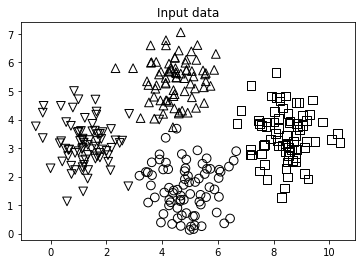

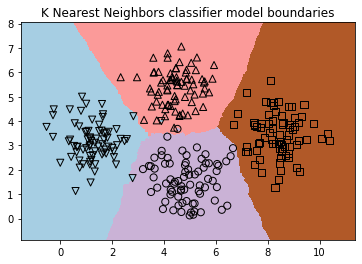

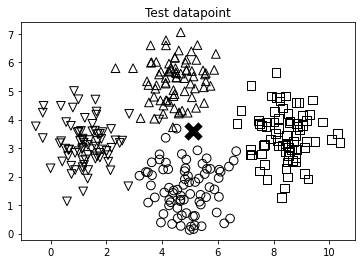

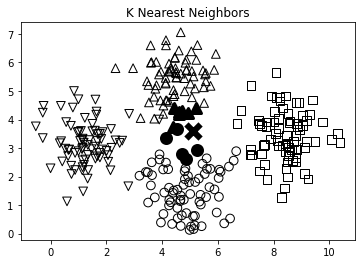

In [47]:
input_file = 'data.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1].astype(np.int)

# Plot input data
plt.figure()
plt.title('Input data')
marker_shapes = 'v^os'
mapper = [marker_shapes[i] for i in y]
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

# Number of nearest neighbors 
num_neighbors = 12

# Step size of the visualization grid
step_size = 0.01  

# Create a K Nearest Neighbours classifier model 
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')

# Train the K Nearest Neighbours model
classifier.fit(X, y)

# Create the mesh to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), 
        np.arange(y_min, y_max, step_size))

# Evaluate the classifier on all the points on the grid 
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

# Visualize the predicted output 
output = output.reshape(x_values.shape)
plt.figure()
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired)

# Overlay the training points on the map
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')

plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('K Nearest Neighbors classifier model boundaries')

# Test input datapoint
test_datapoint = [5.1, 3.6]
plt.figure()
plt.title('Test datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
        linewidth=6, s=200, facecolors='black')

# Extract the K nearest neighbors
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(np.int)[0]

# Plot k nearest neighbors
plt.figure()
plt.title('K Nearest Neighbors')

for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[y[i]], 
            linewidth=3, s=100, facecolors='black')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
        linewidth=6, s=200, facecolors='black')

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

print("Predicted output:", classifier.predict([test_datapoint])[0])

plt.show()

5. Analisa algoritma untuk states.py. Dan analisa algoritmanya dan jalankan di komputer anda (untuk Chapter 6)

In [49]:
from logpy import run, fact, eq, Relation, var

adjacent = Relation()
coastal = Relation()

file_coastal = '/content/drive/My Drive/Dataset for UTS AI/coastal_states.txt'
file_adjacent = '/content/drive/My Drive/Dataset for UTS AI/adjacent_states.txt'

# Read the file containing the coastal states
with open(file_coastal, 'r') as f:
    line = f.read()
    coastal_states = line.split(',')

# Add the info to the fact base
for state in coastal_states:
    fact(coastal, state)

# Read the file containing the coastal states
with open(file_adjacent, 'r') as f:
    adjlist = [line.strip().split(',') for line in f if line and line[0].isalpha()]

# Add the info to the fact base
for L in adjlist:
    head, tail = L[0], L[1:]
    for state in tail:
        fact(adjacent, head, state)

# Initialize the variables
x = var()
y = var()

# Is Nevada adjacent to Louisiana?
output = run(0, x, adjacent('Nevada', 'Louisiana'))
print('\nIs Nevada adjacent to Louisiana?:')
print('Yes' if len(output) else 'No')

# States adjacent to Oregon
output = run(0, x, adjacent('Oregon', x))
print('\nList of states adjacent to Oregon:')
for item in output:
    print(item)

# States adjacent to Mississippi that are coastal
output = run(0, x, adjacent('Mississippi', x), coastal(x))
print('\nList of coastal states adjacent to Mississippi:')
for item in output:
    print(item)

# List of 'n' states that border a coastal state
n = 7
output = run(n, x, coastal(y), adjacent(x, y))
print('\nList of ' + str(n) + ' states that border a coastal state:')
for item in output:
    print(item)

# List of states that adjacent to the two given states
output = run(0, x, adjacent('Arkansas', x), adjacent('Kentucky', x))
print('\nList of states that are adjacent to Arkansas and Kentucky:')
for item in output:
    print(item)

ImportError: cannot import name 'Iterator' from 'collections' (/usr/lib/python3.10/collections/__init__.py)